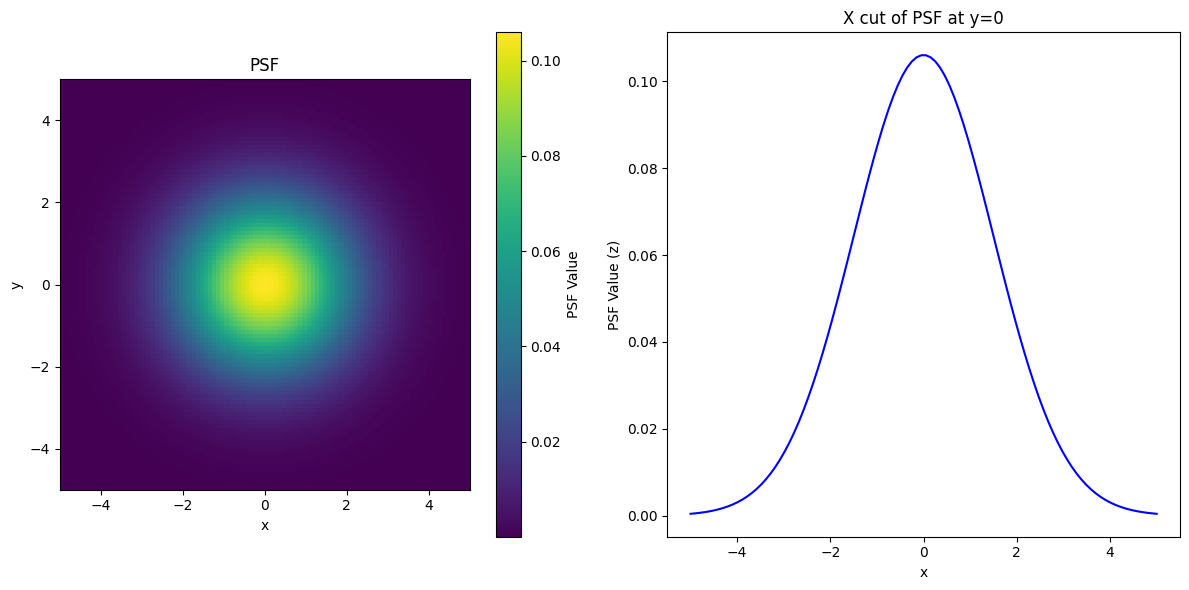

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Gussian function
def PSF(x, y, sigma = 1.5):
    result = np.exp(-(np.power(x, 2) + np.power(y, 2)) / (2 * np.power(sigma, 2))) / 2 / np.pi / np.sqrt(np.power(sigma, 2))
    return result


# Set x, y range
x = np.linspace(-5, 5, 100)  
y = np.linspace(-5, 5, 100)  
X, Y = np.meshgrid(x, y)

# count each point
Z = PSF(X, Y, sigma=1.5)

# slice at center(y = 0)
z_slice = PSF(x, 0, sigma=1.5)

# Plot PSF figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# left side: PSF's 2D image
im = ax1.imshow(Z, extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
fig.colorbar(im, ax=ax1, label="PSF Value")
ax1.set_title("PSF")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# right side: x-z image（y=0）
ax2.plot(x, z_slice, color='blue')
ax2.set_title("X cut of PSF at y=0")
ax2.set_xlabel("x")
ax2.set_ylabel("PSF Value (z)")

plt.tight_layout()
plt.show()

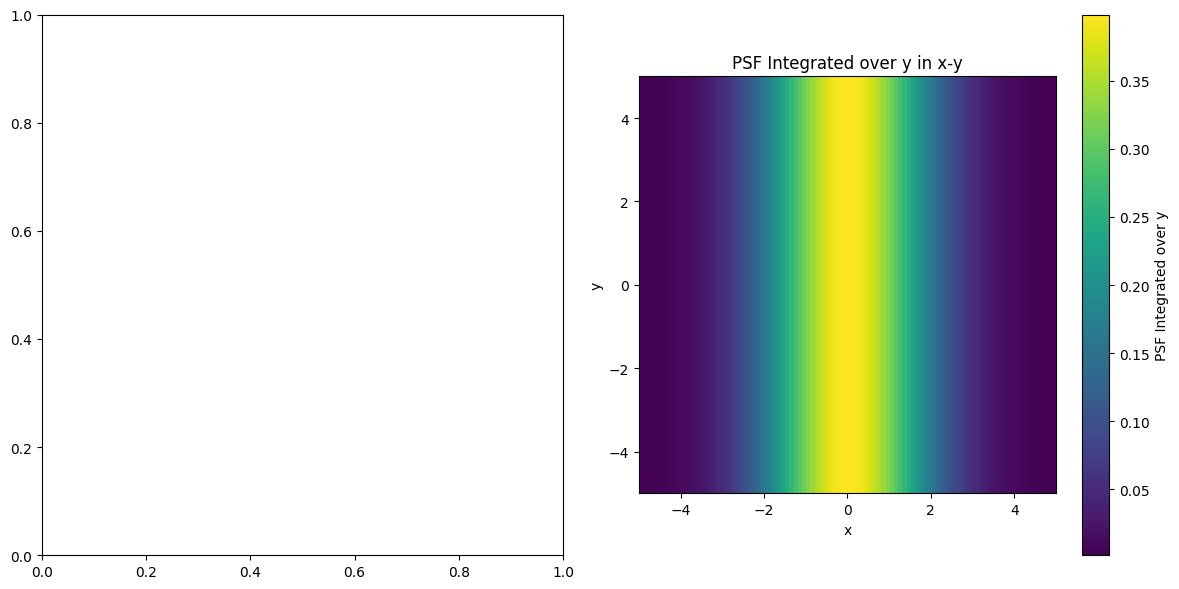

In [6]:
from scipy.integrate import quad


def PSF_integrated_y(x, sigma=1.5):
    result, error = quad(lambda y: PSF(x, y, sigma), -np.inf, np.inf)
    return result

# count integraded_y
Z_integrated_y = np.array([PSF_integrated_y(xi, sigma=1.5) for xi in x])
Z_integrated_y = np.tile(Z_integrated_y, (100, 1)) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

im2 = ax2.imshow(Z_integrated_y, extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
fig.colorbar(im2, ax=ax2, label="PSF Integrated over y")
ax2.set_title("PSF Integrated over y in x-y")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()